#  Mathematische Einführung

 ### Arrays, Matrizen und elementare Lineare Algebra

Erzeugen Sie eine Matrix $\mathbf{A}\in \mathbb{R}^{5\times 10}$ mit normalverteilten Zufallszahlen und transformieren (Multiplikation mit der Matrix $\mathbf{A}$) Sie den unten im Code angegebenen Vektor $\vec{x} \in \mathbb{R}^{10}$. 

In [ ]:
import numpy as np
x = np.random.randn(10,1)
#################
## your code here
#################
A = np.random.randn(5,10)
np.dot(A,x) 

Bei arrays gibt es auch das sogenannte direkte Produkt $\mathbf{A}\ast \mathbf{A}$, welches eine elementweis Multiplikation der Elemente vornimmt. Nehmen Sie eine elementweise Multiplikation der Matrix $\mathbf{A}\in \mathbb{R}^{5\times 10}$ vor. Was für eine Matrix erhalten Sie, wenn Sie das Matrixprodukt $\mathbf{A}\cdot \mathbf{A}^T$ bzw.
$\mathbf{A}^T\cdot \mathbf{A}$ bilden?

In [ ]:
#################
## your code here
#################
print(A*A) # Ergibt eine 5 x 10 Matrix
print(np.dot(A,A.T)) # Ergibt eine 5 x 5 Matrix
print(np.dot(A.T,A)) # Ergibt eine 10 x 10 Matrix

In [43]:
I = np.identity(5)
print(I)
np.sum(I,axis=0,keepdims=True)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


array([[1., 1., 1., 1., 1.]])

In späteren Kapiteln (inbesondere bei Convolutional Neural Networks) benötigen wir auch mehrdimensionale arrays. Als Beispiel betrachten wir ein $n\times m$ grosses RGB-Farbbild: Als array in python hat dieses Bild also die Größe $(n,m,3)$. Erzeugen Sie ein neues Bild der Größe $(n,m,1)=(n,m)$, indem Sie für jedes Pixel über die drei Farbkanäle summieren. Welche Werte haben $n,m$?

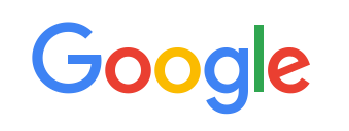

(114, 325, 3)


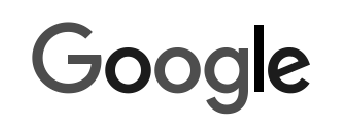

(114, 325)

In [48]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

test_image = plt.imread("test_image.png")
plt.imshow(test_image)
plt.axis("off")
plt.show()

#################
## your code here
#################
# Wir lassen und die Dimensionen des arrays ausgeben
print(test_image.shape)


# Wir summieren für jedes Pixel jeweils über den Farbkanal 
# (3. Index --> in Python der 2. Index - Zählung  startet von 0)
test_image_grey = np.sum(test_image,axis=2)
plt.imshow(test_image_grey,cmap='gray')
plt.axis("off")
plt.show()
test_image_grey.shape

### Analysis und mehrdimensionale Analysis

Plotten Sie die Höhenlinien der Funktion
$$
f(x,y) = (0.1 x-1)^2 + (10y+1)^2.
$$
Wenn Sie einfach den Code aus der Vorlesung kopieren: Was müssen Sie ändern, damit die Höhenlinien dieser Funktion besser entsprechen?

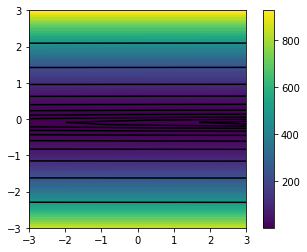

In [19]:
import numpy as np
import matplotlib.pyplot as plt
#################
## your code here
#################
x, y = np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
z = (0.1*x-1)**2 + (10*y+1)**2
plt.figure()
plt.pcolormesh(x, y, z)
plt.colorbar()
# Wir verwenden hier ein logarithmisches Spacing der Höhenlinien, da sich 
# die führenden x^2, y^2 Terme um einen Faktor 10^2/0.1^2 = 10000 unterscheiden 
plt.contour(x, y, z, levels = np.logspace(-3,3,20), colors="k")
plt.gca().set_aspect("equal")
plt.show()

### Aktivierungsfunktionen

- Bestimmen Sie die Ableitungen $\sigma_i'(x)$ der Aktivierungsfunktionen $\sigma_i(x)$
und plotten Sie diese in ein gemeinsames Schaubild.
- Zeigen Sie inbesondere, dass für $\sigma_1(x)$ gilt 
$$
\sigma_1'(x) = \sigma_1(x)\cdot\left(1-\sigma_1(x)\right)
$$

Wir berechnen die drei Ableitungen
- $\sigma_1'(x) = \frac{e^{-x}}{(e^{-x}+1)^2} = \frac{1}{e^{-x}+1}\frac{e^{-x}}{e^{-x}+1} = \frac{1}{e^{-x}+1}\frac{e^{-x}+1-1}{e^{-x}+1} = \frac{1}{e^{-x}+1}\left(1-\frac{1}{e^{-x}+1}\right) = \sigma_1(x)\left(1-\sigma_1(x)\right)$
- $\sigma_2'(x) = \frac{\cosh^2(x)-\sinh^2(x)}{\cosh^2(x)} = \frac{1}{\cosh^2(x)}$
- $\sigma_3'(x) = \begin{cases} 0 & x<0 \\ 1 & x\geq 0\end{cases}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#################
## your code here
#################
x  = np.linspace(-4,4,100)
y1_s = (1.0/(np.exp(-x)+1))*(1.0-1.0/(np.exp(-x)+1))
y2_s = 1.0-(np.tanh(x))**2
# Um die Funktion sigma_3 zu plotten, können wir die sign-Funktion (diese ist -1 für x<0 und +1 für x>0) verwenden
y3_s = 0.5 * (np.sign(x) + 1)

plt.figure()
plt.plot(x, y1_s,'b')
plt.plot(x, y2_s,'g')
plt.plot(x, y3_s,'r')
plt.show()

### Statistik

Betrachten Sie die Daten des arrays X (siehe code unten). 
- Berechnen Sie die Kovarianzmatrix $\mathbf{C}$ 
- Berechnen Sie die Eigenwerte und Eigenvektoren der Matrix $\mathbf{C}$. 
- Wie können Sie numerisch zeigen, dass die Eigenvektoren orthonormal sind?

In [49]:
import numpy as np
import matplotlib.pyplot as plt
X=np.array([[1,2,3,4,5,6],[6,5,4,3,2,1],[1,0,1,0,1,0],[2,2,2,2,2,2]])
#################
## your code here
#################
C = np.cov(X)
print(C)

# eigh liefert im Vergleich zu eig sortierte Eigenwerte (aufsteigend)
w,v = np.linalg.eigh(C)

# w enthält die Eigenwerte (1 x 4 array)
# v enthält die normierten Eigenvektoren v_i (i=1,2,3,4) als Spaltenvektoren /(4 x 4 array)
print(w)
print(v)

# Multiplizieren wir die Matrix v^T mit v, so enthält die resultierende Matrix an der Stelle (i,j)
# genau das Skalarprodult von v_i mit v_j. Da die Eigenvektoren einer symmetrischen Matrix orthonormal sind, ergibt
# sich hier gerade die 4 x 4 - Einheitsmatrix 
print(np.dot(v.T,v))



[[ 3.5 -3.5 -0.3  0. ]
 [-3.5  3.5  0.3  0. ]
 [-0.3  0.3  0.3  0. ]
 [ 0.   0.   0.   0. ]]
[0.00000000e+00 7.81066981e-16 2.73241199e-01 7.02675880e+00]
[[ 0.00000000e+00  7.07106781e-01  4.45095608e-02 -7.05704541e-01]
 [ 0.00000000e+00  7.07106781e-01 -4.45095608e-02  7.05704541e-01]
 [ 0.00000000e+00 -4.85722573e-17  9.98016933e-01  6.29460245e-02]
 [ 1.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -2.01806103e-17 -2.59436837e-16]
 [ 0.00000000e+00 -2.01806103e-17  1.00000000e+00 -2.78755503e-17]
 [ 0.00000000e+00 -2.59436837e-16 -2.78755503e-17  1.00000000e+00]]


### Faltung

Betrachten Sie folgende Signal (array s) und den Faltungskern (array g).
- Berechnen Sie die Faltung $(s\ast g)$
- Plotten Sie $s$ und $(s\ast g)$ in ein gemeinsames Schaubild
- Plotten Sie den Faltungskern $g$ in ein seperates Schaubild.
- Interpretieren Sie das Ergebnis

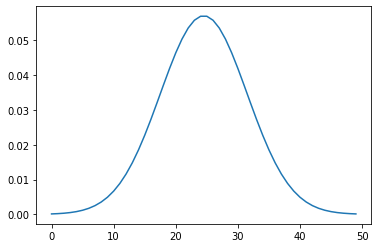

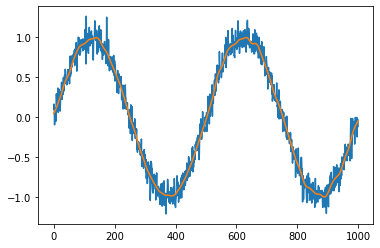

1.0

In [50]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Das Signal ist ein verrauschtes Sinus-Signal (mit zwei vollen Schwingungen)
s = np.sin(np.linspace(0,4*np.pi,1000)) + 0.1*np.random.randn(1000)

# Der Faltungskern g ist eine normierte Gauß-Funktion 
g = signal.gaussian(50, std=7)/np.sum(signal.gaussian(50, std=7))
plt.plot(g)
plt.show()

# Wir plotten das Signal, führen die Faltung aus und plotten dann das gefaltete Signal in 
# das gleiche Schaubild. Die Faltung/Mittelung mit der Gauß-Funktion berwirkt eine Glättung 
# des verrauschten Signals
#plt.plot(s)

plt.plot(s)
plt.plot(np.convolve(s,g,'same'))
plt.show()



c = np.convolve(s,g,'valid')
c.shape
sum(g)